In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv('HR_comma_sep.csv')

In [29]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [31]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


0    11428
1     3571
Name: left, dtype: int64


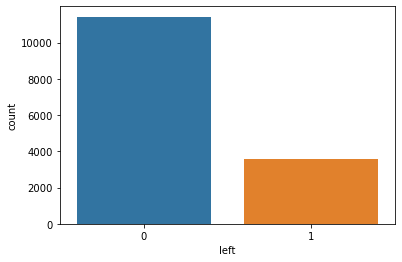

In [32]:
print(data['left'].value_counts())
sns.countplot(data['left'],label='count')

In [33]:
left = data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [34]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


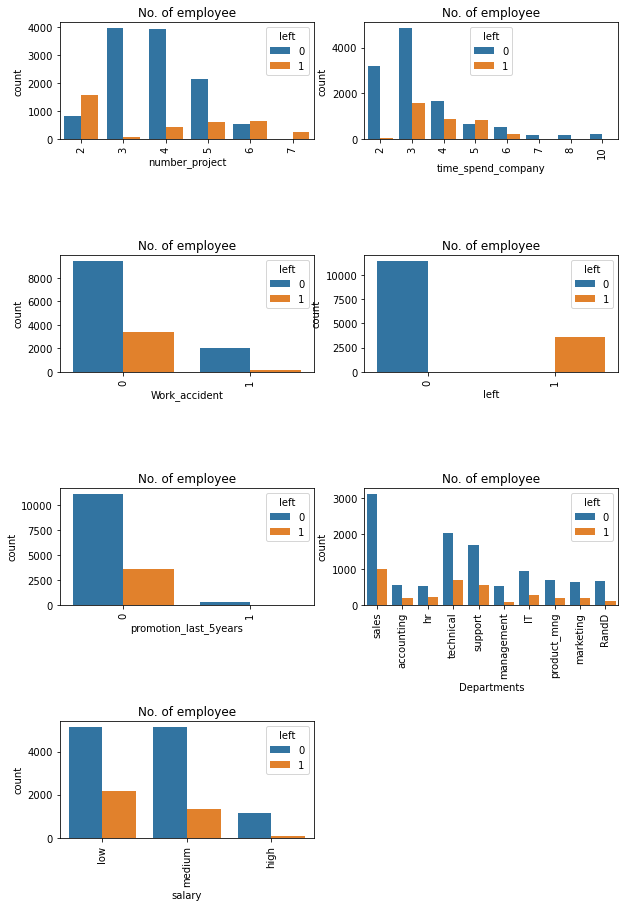

In [35]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
     plt.subplot(4, 2, i+1)
     plt.subplots_adjust(hspace = 1.0)
     sns.countplot(x=j,data = data,hue='left')
     plt.xticks(rotation=90)
     plt.title("No. of employee")

  Correlation   
left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64
     Heatmap    


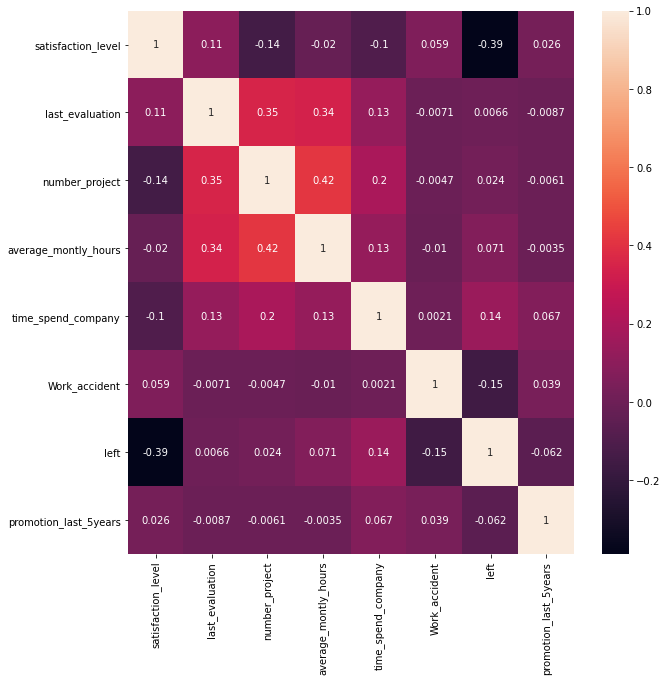

In [36]:
print("  Correlation   ")
cor_relation = data.corr()
print(cor_relation['left'].sort_values(ascending=False))
plt.figure(figsize=(10,10))
print("     Heatmap    ")
sns.heatmap(cor_relation,annot=True)
plt.show()

In [37]:
X = data.drop(labels='left',axis=1).values
y = data['left'].values

In [38]:
from sklearn.preprocessing import LabelEncoder
Lc_salary = LabelEncoder()
X[:,8] = Lc_salary.fit_transform(X[:,8])

In [39]:
X

array([[0.38, 0.53, 2, ..., 0, 'sales', 1],
       [0.8, 0.86, 5, ..., 0, 'sales', 2],
       [0.11, 0.88, 7, ..., 0, 'sales', 2],
       ...,
       [0.37, 0.53, 2, ..., 0, 'support', 1],
       [0.11, 0.96, 6, ..., 0, 'support', 1],
       [0.37, 0.52, 2, ..., 0, 'support', 1]], dtype=object)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:,0:5] = sc.fit_transform(X[:,0:5])

In [41]:
X.shape

(14999, 9)

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[7])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [45]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9715555555555555
Precision: 0.9600389863547758
Recall: 0.9188432835820896


In [46]:
metrics.confusion_matrix(y_test, y_pred)

array([[3387,   41],
       [  87,  985]], dtype=int64)

In [47]:
import pickle

In [48]:
pickle.dump(gb, open('model.pkl','wb'))